# PROYECTO ALURA LATAM

## Configuración inicial

In [16]:
# Importación de librerías
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt

# URL de la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Configuración de carpetas
PATH = os.getcwd()
DATA_PATH = os.path.join(PATH, "data")
FIGURES_PATH = os.path.join(PATH, "figures")

In [3]:
# Creación de carpetas
try:
    os.makedirs(DATA_PATH, exist_ok=True)
    os.makedirs(FIGURES_PATH, exist_ok=True)
except:
    pass

## Extración

In [4]:
# Extracción de datos con la API
response = requests.get(url)
data = response.json()
if data: 
    print(f'Conexión exitosa')
else: 
    print(f'Algo salió mal')
# Creación del DataFrame
df = pd.DataFrame(data)

# Guardamos el Dataframe en bruto (Capa de bronce)
df.to_csv(os.path.join(DATA_PATH, "Bronze_data.csv"), index=False)

Conexión exitosa


In [5]:
# Vamos a conocer cómo es nuestro DataFrame
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [6]:
# Normalización de columnas dict en un bucle (evita desalineación)
from pandas import json_normalize

dict_cols = ["customer", "phone", "internet", "account"]   # columnas con objetos (dict)
id_cols = ["customerID", "Churn"]                          # columnas base que conservan la granularidad

# Base con índice limpio
base = df[id_cols].reset_index(drop=True).copy()
partes = [base]

for col in dict_cols:
    # Sustituye None / valores no-dict por {}
    serie = df[col].apply(lambda x: x if isinstance(x, dict) else {})
    plano = json_normalize(serie)
    partes.append(plano.reset_index(drop=True))

# Concatenación horizontal alineada por posición (índices ya reiniciados)
df_telecom = pd.concat(partes, axis=1)

# Validaciones rápidas
assert len(df_telecom) == len(df), "Desalineación en filas"
if "customerID" in df_telecom.columns:
    assert df_telecom["customerID"].is_unique, "customerID duplicado (revisar fuente)"

# Este sería el dataset "procesado" considerando las listas anidadas
df_telecom 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Transformación

### Conocer el conjunto de datos

In [ ]:
# Conoceremos los tipos de datos en el dataframe:
print(df_telecom.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Búsqueda de inconsistencias

In [8]:
# Conteo de valores únicos por columna 
print(df_telecom.nunique())

# Usaremos un valor de muestra
print(f"Valores únicos en Churn: {df_telecom['Churn'].unique()}") 
# Para esta parte identificamos que hay valores vacíos en la columna "Churn"

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64
Valores únicos en Churn: ['No' 'Yes' '']


### Manejo de inconsistencias

In [9]:
# Con el problema identificado primero vamos a reemplazar los valores vacíos por valores nulos
df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)

# Manejamos los valores nulos a través de las condiciones de las columnas [tenure, charges.total]
df_telecom['Churn'] = df_telecom.apply(
    lambda row: 'Yes' if pd.isna(row['Churn']) and row['tenure'] == 0 and row['Charges.Total'] == 0
    else ('No' if pd.isna(row['Churn']) and (row['tenure'] > 0 or row['Charges.Total'] > 0)
          else row['Churn']),
    axis=1
)

### Creación de columna "Cuentas_Diarias"

In [10]:
# Para la creación de la columna 'cuentas_diarias' usaremos insert y lo calcularemos en base a la columna Charges.Monthly
df_telecom.insert(19, 'cuentas_diarias', (df_telecom['Charges.Monthly']/30))

### Estandarización y transformación de los datos

In [11]:
# Estandarización de datos, se estudió previamente los valores únicos de los datos para evaluar su comportamiento .
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
df_telecom['gender'] = df_telecom['gender'].map({'Male': 1, 'Female': 0})
df_telecom['Partner'] = df_telecom['Partner'].map({'Yes': 1, 'No': 0})
df_telecom['Dependents'] = df_telecom['Dependents'].map({'Yes': 1, 'No': 0})
df_telecom['PhoneService'] = df_telecom['PhoneService'].map({'Yes': 1, 'No': 0})
df_telecom['PaperlessBilling'] = df_telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [12]:
# Traducir las columnas
map_cols = {
    'Churn':'evasion',
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'backup_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_sin_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
}
df_telecom = df_telecom.rename(columns=map_cols)

# Conversión numérica (coerce para transformar no numéricos a NaN)
for col_num in ['cargos_mensuales', 'cargos_totales', 'antiguedad_meses']:
    if col_num in df_telecom.columns:
        df_telecom[col_num] = pd.to_numeric(df_telecom[col_num], errors='coerce')
df_telecom.dtypes
# # Resumen rápido de conversiones
print(df_telecom[['cargos_mensuales','cargos_totales','antiguedad_meses']].dtypes)
print('NaN cargos_mensuales:', df_telecom['cargos_mensuales'].isna().sum())
print('NaN cargos_totales:', df_telecom['cargos_totales'].isna().sum())
print('NaN antiguedad_meses:', df_telecom['antiguedad_meses'].isna().sum())

cargos_mensuales    float64
cargos_totales      float64
antiguedad_meses      int64
dtype: object
NaN cargos_mensuales: 0
NaN cargos_totales: 11
NaN antiguedad_meses: 0


### Diccionario de Datos (Silver)

| Original | Actual (snake_case) | Tipo esperado | Descripción / Notas |
|----------|---------------------|---------------|---------------------|
| customerID | id_cliente | string | Identificador único del cliente. Clave primaria. |
| Churn | evasion | int (0/1) | Indicador de evasión (1 = se fue, 0 = permanece). Validar definición de negocio. |
| gender | genero | int (0/1) | Género (1 = Male, 0 = Female). Revisar si existen otros valores. |
| SeniorCitizen | adulto_mayor | int (0/1) | 1 si edad ≥ 65, 0 en caso contrario. |
| Partner | pareja | int (0/1) | 1 si reporta pareja. |
| Dependents | dependientes | int (0/1) | 1 si tiene dependientes. |
| tenure | antiguedad_meses | int | Meses continuos como cliente. Debe ser ≥ 0. |
| PhoneService | servicio_telefono | int (0/1) | 1 si tiene servicio telefónico. |
| MultipleLines | multiples_lineas | int (0/1) | 1 si tiene múltiples líneas telefónicas. |
| InternetService | servicio_internet | category/string | Proveedor / tipo de servicio de internet. |
| OnlineSecurity | seguridad_en_linea | int (0/1) | 1 si contrató seguridad en línea adicional. |
| OnlineBackup | backup_en_linea | int (0/1) | 1 si contrató respaldo en línea. |
| DeviceProtection | proteccion_dispositivo | int (0/1) | 1 si contrató protección de dispositivo. |
| TechSupport | soporte_tecnico | int (0/1) | 1 si contrató soporte técnico adicional. |
| StreamingTV | tv_streaming | int (0/1) | 1 si tiene servicio de TV en streaming. |
| StreamingMovies | peliculas_streaming | int (0/1) | 1 si tiene servicio de películas en streaming. |
| Contract | tipo_contrato | category/string | Tipo de contrato (mensual, 1 año, 2 años, etc.). |
| PaperlessBilling | facturacion_sin_papel | int (0/1) | 1 si recibe factura electrónica. |
| PaymentMethod | metodo_pago | category/string | Método de pago preferido. |
| MonthlyCharges | cargos_mensuales | float | Total mensual facturado (suma de servicios activos). |
| TotalCharges | cargos_totales | float | Total acumulado facturado al cliente. |
| cuentas_diarias (derivada) | cuentas_diarias | float | cargos_mensuales / 30 (estimación diaria). |

### Notas de Calidad y Transformaciones
- Columnas binarias codificadas a 0/1 tras map de {'Yes':1,'No':0} (verificar ausencia de variantes: 'Y','N',' ').
- Conversión numérica aplicada a cargos_mensuales, cargos_totales y antiguedad_meses (coercer valores inválidos → NaN).

In [13]:
# Guardamos el dataframe capa silver 
try:
    df_telecom.to_csv(os.path.join(DATA_PATH, "Silver_data.csv"), index=False)
except Exception as e:
    print(f"Error al guardar el archivo CSV: {e}")

## Carga y Análisis

### Análisis descriptivo

In [15]:
df_telecom.describe()

,evasion,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefono,facturacion_sin_papel,cuentas_diarias,cargos_mensuales,cargos_totales
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,2.157337,64.720098,2280.634213
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,1.004319,30.129572,2268.632997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.180833,35.425000,400.225000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,2.343333,70.300000,1391.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.995833,89.875000,3785.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,3.958333,118.750000,8684.800000


### Distribución de la evasión

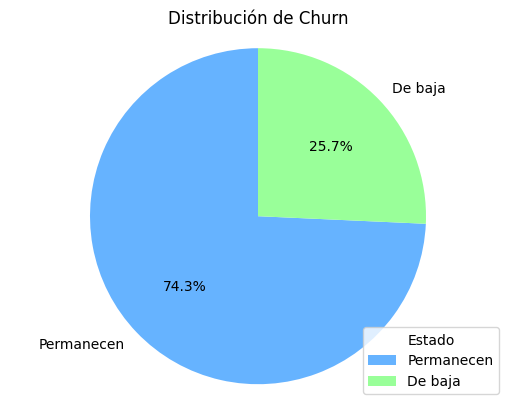

In [25]:
# Plantearemos los datos que usaremos para el gráfico
conteo_evasion = df_telecom['evasion'].value_counts()
labels = ['Permanecen', 'De baja']

# Configuramos los colores
colores_pastel = ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Hacemmos el gráfico pie
plt.pie(conteo_evasion, labels=labels, autopct='%1.1f%%', startangle=90, colors=colores_pastel)
plt.title('Distribución de Churn')
plt.axis('equal') 
plt.legend(title='Estado', loc='lower right')
plt.show()